### Persistance images from zero homology 

In [11]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

In [3]:
import numpy as np
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

from ripser import Rips
from persim import PersImage
from persim import PersistenceImager

In [4]:
import tadasets
np.random.seed(565656)

In [5]:
# creating the sample data
N = 200
N_per_class = int(N / 2)
N_in_class = 400

def noise(N, scale):
    return scale * np.random.random((N, 2))

def circle(N, scale, offset):
    return offset + scale * datasets.make_circles(n_samples=N, factor=0.4, noise=0.05)[0]

just_noise = [noise(N_in_class, 150) for _ in range(N_per_class)]

half = int(N_in_class / 2)
with_circle = [np.concatenate((circle(half, 50, 70), noise(half, 150)))
               for _ in range(N_per_class)]

datas = []
datas.extend(just_noise)
datas.extend(with_circle)

# Define labels
labels = np.zeros(N)
labels[N_per_class:] = 1

In [6]:
# contaons 400 XY points( selecting one dataset)
data = datas[0]

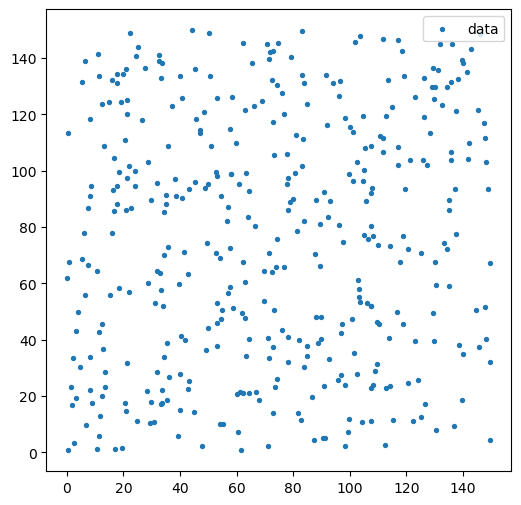

In [108]:
plt.rcParams["figure.figsize"] = (6, 6)
plt.scatter(data[:,0], data[:,1], label="data", s=8)
plt.axis('equal')
plt.legend()
plt.show()

In [7]:
# creating the persistence diagram from rips class
rips = Rips(maxdim=1, coeff=2)
dgms = rips.fit_transform(data)

Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


In [110]:
len(dgms)

2

In [8]:
# seperate the diagrams H0 and H1
diagrams_h0 = dgms[0]
diagrams_h1 = dgms[1]

In [9]:
# remove last data point in H0 diagram - it is infinity
diagrams_h0_without_inf = diagrams_h0[0:-1]

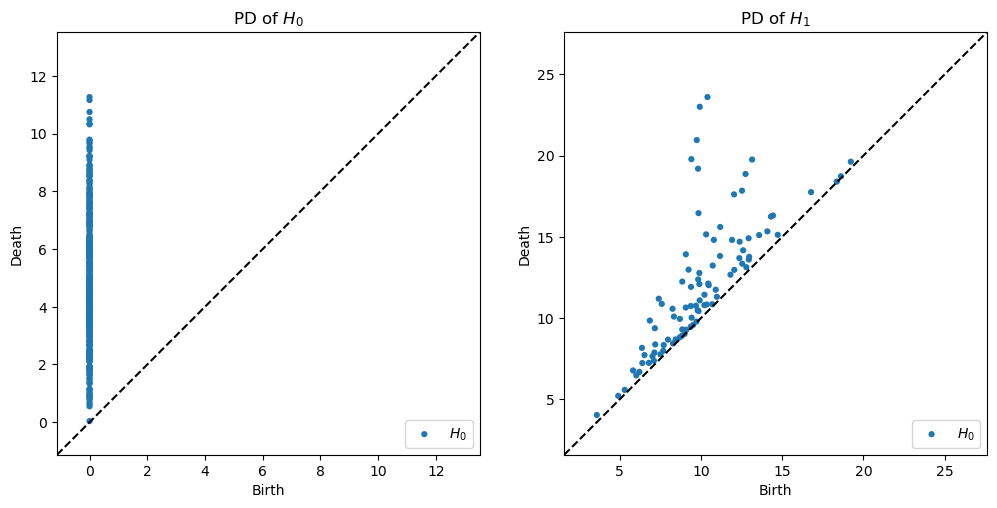

In [12]:
plt.figure(figsize=(12,6))
plt.subplot(121)

rips.plot(diagrams_h0_without_inf, show=False)
plt.title("PD of $H_0$")

plt.subplot(122)
rips.plot(diagrams_h1, show=False)
plt.title("PD of $H_1$")

plt.show()

##### Creating the persistance images

In [14]:
# For the default bivariate normal Gaussian kernel, the parameter controlling the spread (sigma) may be specified 
# either by a float or a 2x2 covariance matrix
pimgr = PersistenceImager(pixel_size=0.1)
pimgr.fit(diagrams_h0_without_inf)

In [15]:
print(pimgr)

PersistenceImager(birth_range=(0.0, 0.0), pers_range=(0.0014804232865568423, 11.301480423286558), pixel_size=0.1, weight=persistence, weight_params={'n': 1.0}, kernel=gaussian, kernel_params={'sigma': [[1.0, 0.0], [0.0, 1.0]]})


In [16]:
#PersistenceImager() attributes can be adjusted at or after instantiation. 
# Updating attributes of a PersistenceImager() object will automatically update all other dependent attributes:

pimgr.pixel_size = 1
pimgr.birth_range = (-10, 10)
pimgr.pers_range = (0, 17)

In [17]:
print(pimgr)
print(pimgr.resolution)

PersistenceImager(birth_range=(-10.0, 10.0), pers_range=(0.0, 17.0), pixel_size=1, weight=persistence, weight_params={'n': 1.0}, kernel=gaussian, kernel_params={'sigma': [[1.0, 0.0], [0.0, 1.0]]})
(20, 17)


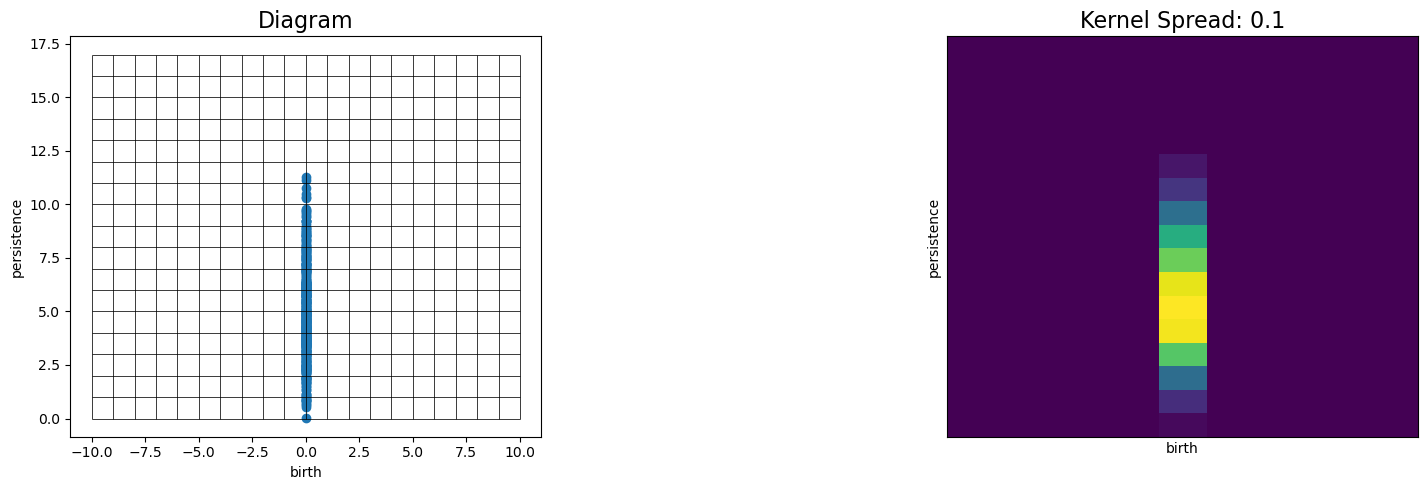

In [18]:
# pixel size 1 and sigma 0.1
fig, axs = plt.subplots(1, 2, figsize=(20,5))
pimgr.kernel_params = {'sigma': .1}
pimgr.plot_diagram(diagrams_h0_without_inf, skew=True, ax=axs[0])
axs[0].set_title('Diagram', fontsize=16)

pimgr.kernel_params = {'sigma': 0.1}
pimgr.plot_image(pimgr.transform(diagrams_h0_without_inf), ax=axs[1])
axs[1].set_title('Kernel Spread: 0.1', fontsize=16)


plt.tight_layout()
plt.show()

##### Persistance image using 3 data points

In [19]:
# creating a new persistance H0 data
A = np.array([[0.5,0.75],[0.5,1],[0.5,1.25]])

In [270]:
# # # remove infinite bars
# diagrams_h0_without_inf = diagrams_h0[0:-1]

In [20]:
# assigning the new diagram to the old diagram
diagrams_h0_without_inf = A

##### Persistance Image where the points are weighted by their life-time.

In [21]:
# persistance data for H0 without inf value
len(diagrams_h0_without_inf)

3

In [22]:
# lifetime is y coordinates diagrams_h0_without_inf
lifetime = diagrams_h0_without_inf[:,1]

In [23]:
len(lifetime)

3

In [37]:
# Define custom weighting function that uses lifetime as weight 
# default weight function is 'persistance'
def weight_by_lifetime(birth, persistence, lifetime, **kwargs):
    # Use lifetime as weight
    #return lifetime
    return np.exp(lifetime)

In [25]:
# For the default bivariate normal Gaussian kernel, the parameter controlling the spread (sigma) may be specified 
# either by a float or a 2x2 covariance matrix
pimgr = PersistenceImager(pixel_size=0.1, weight=weight_by_lifetime, weight_params={'lifetime': lifetime})
pimgr.fit(diagrams_h0_without_inf)

In [26]:
print(pimgr)

PersistenceImager(birth_range=(0.5, 0.5), pers_range=(0.25, 0.75), pixel_size=0.1, weight=weight_by_lifetime, weight_params={'lifetime': array([0.75, 1.  , 1.25])}, kernel=gaussian, kernel_params={'sigma': [[1.0, 0.0], [0.0, 1.0]]})


In [27]:
pimgr.pixel_size = 0.012
pimgr.birth_range = (0, 1)
pimgr.pers_range = (0, 1.5)

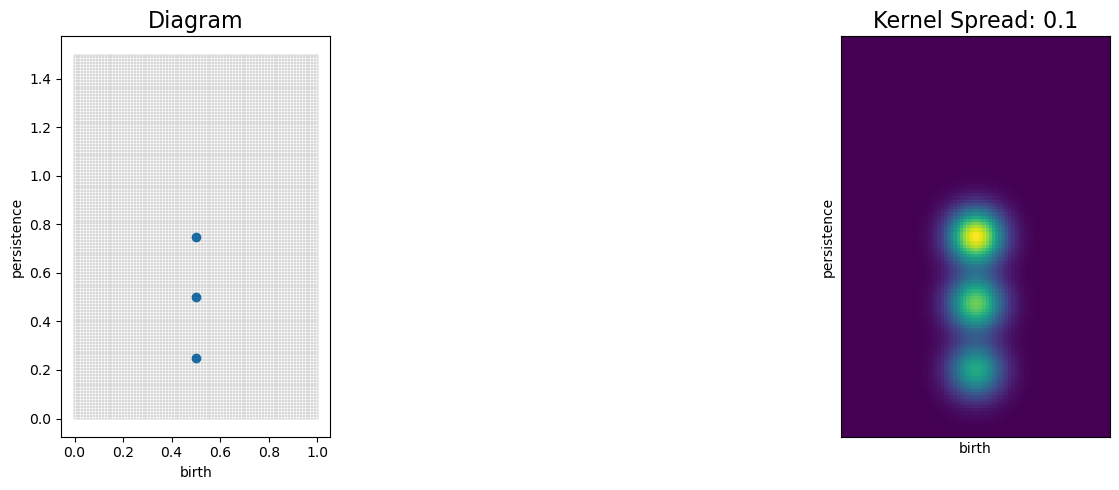

In [28]:
fig, axs = plt.subplots(1, 2, figsize=(20,5))
pimgr.kernel_params = {'sigma': .1}
pimgr.plot_diagram(diagrams_h0_without_inf, skew=True, ax=axs[0])
axs[0].set_title('Diagram', fontsize=16)

pimgr.kernel_params = {'sigma': 0.005}
pimgr.plot_image(pimgr.transform(diagrams_h0_without_inf), ax=axs[1])
axs[1].set_title('Kernel Spread: 0.1', fontsize=16)


plt.tight_layout()
plt.show()

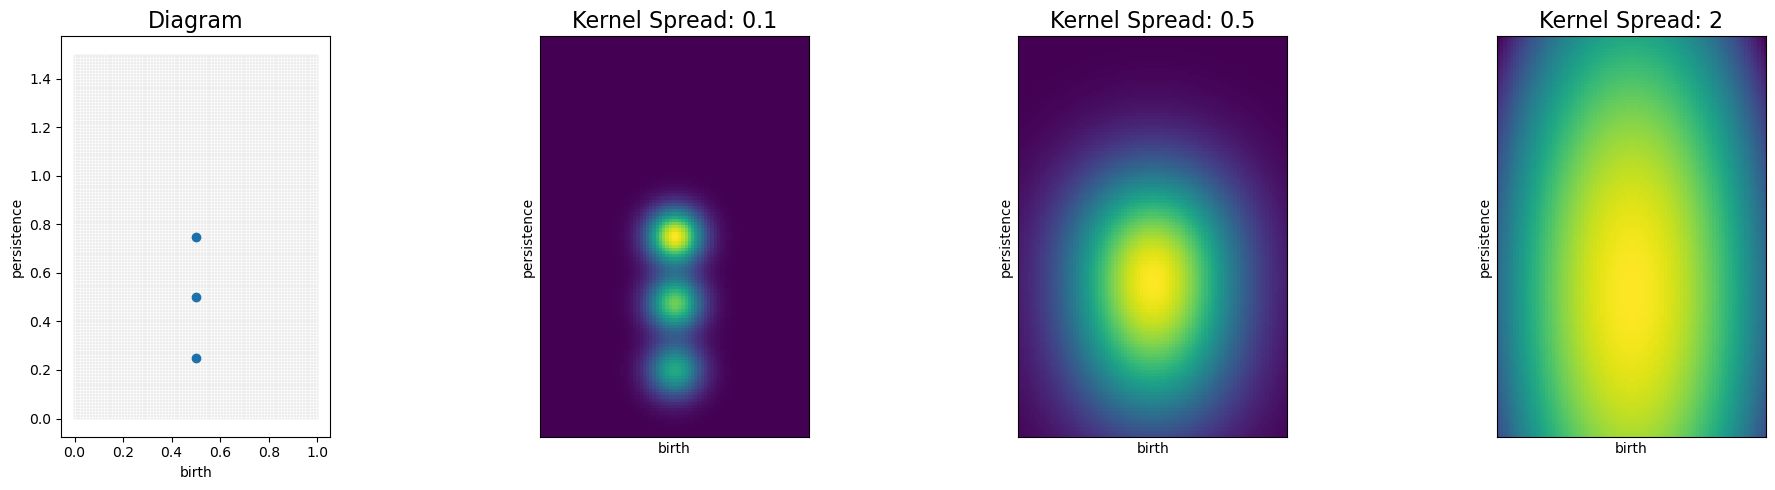

In [29]:
fig, axs = plt.subplots(1, 4, figsize=(20,5))
pimgr.kernel_params = {'sigma': .1}
pimgr.plot_diagram(diagrams_h0_without_inf, skew=True, ax=axs[0])
axs[0].set_title('Diagram', fontsize=16)

pimgr.kernel_params = {'sigma': 0.005}
pimgr.plot_image(pimgr.transform(diagrams_h0_without_inf), ax=axs[1])
axs[1].set_title('Kernel Spread: 0.1', fontsize=16)

pimgr.kernel_params = {'sigma': .05}
pimgr.plot_image(pimgr.transform(diagrams_h0_without_inf), ax=axs[2])
axs[2].set_title('Kernel Spread: 0.5', fontsize=16)

# Non-isotropic, standard bivariate Gaussian with greater spread along the persistence axis
pimgr.kernel_params = {'sigma': np.array([[1, 0],[0, 6]])}
pimgr.plot_image(pimgr.transform(diagrams_h0_without_inf), ax=axs[3])
axs[3].set_title('Kernel Spread: 2', fontsize=16)

plt.tight_layout()
plt.show()

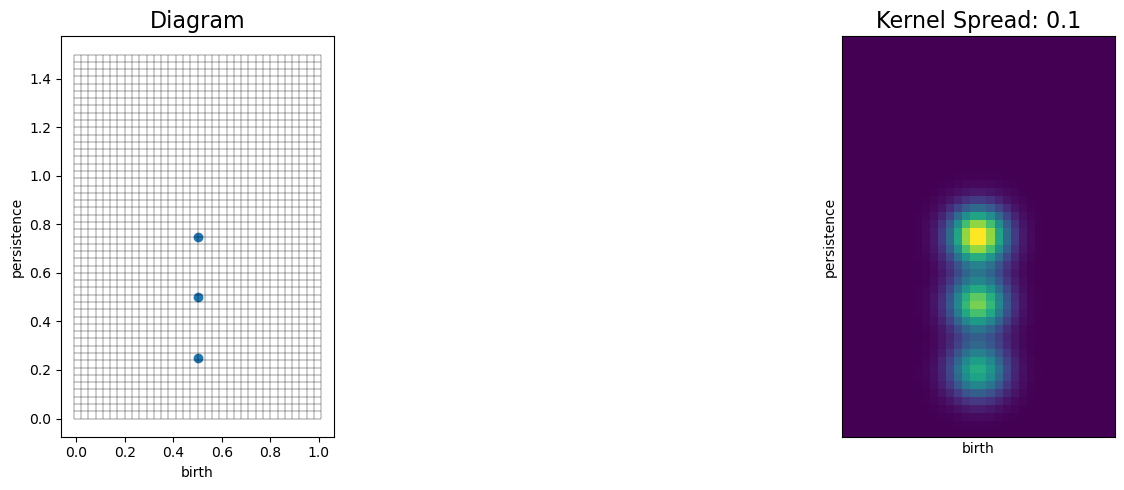

In [35]:
# pixel size 0.03 and sigma 0.005
pimgr.pixel_size = 0.03
pimgr.birth_range = (0, 1)
pimgr.pers_range = (0, 1.5)

fig, axs = plt.subplots(1, 2, figsize=(20,5))
pimgr.kernel_params = {'sigma': .1}
pimgr.plot_diagram(diagrams_h0_without_inf, skew=True, ax=axs[0])
axs[0].set_title('Diagram', fontsize=16)

pimgr.kernel_params = {'sigma': 0.005}
pimgr.plot_image(pimgr.transform(diagrams_h0_without_inf), ax=axs[1])
axs[1].set_title('Kernel Spread: 0.1', fontsize=16)


plt.tight_layout()
plt.show()

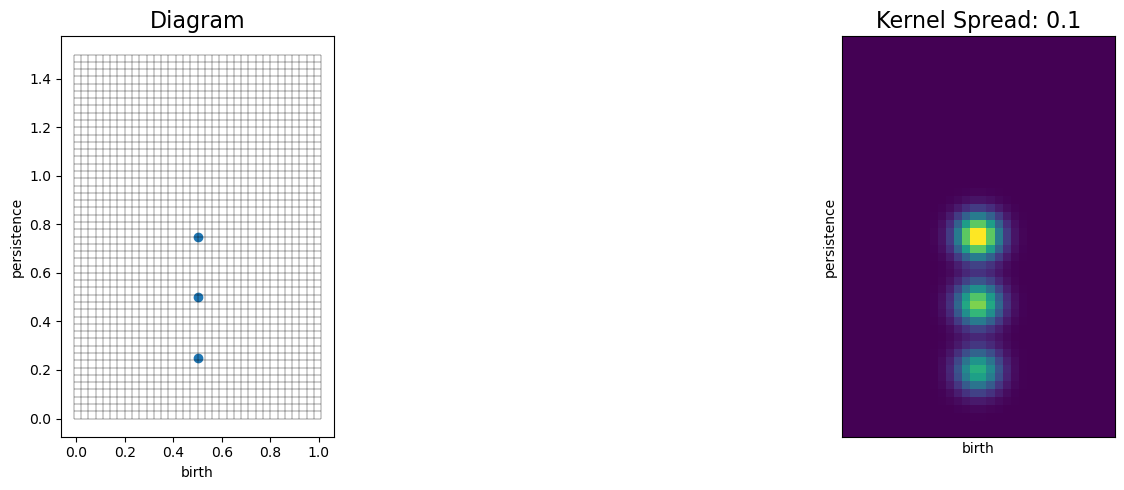

In [36]:
# pixel size 0.03 and sigma 0.003

pimgr.pixel_size = 0.03
pimgr.birth_range = (0, 1)
pimgr.pers_range = (0, 1.5)

fig, axs = plt.subplots(1, 2, figsize=(20,5))
pimgr.kernel_params = {'sigma': .1}
pimgr.plot_diagram(diagrams_h0_without_inf, skew=True, ax=axs[0])
axs[0].set_title('Diagram', fontsize=16)

pimgr.kernel_params = {'sigma': 0.003}
pimgr.plot_image(pimgr.transform(diagrams_h0_without_inf), ax=axs[1])
axs[1].set_title('Kernel Spread: 0.1', fontsize=16)


plt.tight_layout()
plt.show()